## Introduction
This notebook imports sales data for 1 particular item at 1 store.  There is a 'units sold' amount for the item for every day of the year.  The point is to compare to different modeling / predictive methods to predict the number of units sold given a particular day of the year.  We are comparing the classic linear regression model with the K Nearest Neighbor model. 

Import the necessary libraries and methods.

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.5f}'.format
from sklearn.model_selection import cross_val_score
from sklearn import neighbors

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## Import the raw data and clean

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
df_train.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [4]:
df_train.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

Just get store 1, item 1.  Here we are dropping all of the rows below year 2013 for item 1.  We are only considering item 1 for store 1 for the year 2013.

In [5]:
# drop last n rows
# this number was obtained by taking the last index (912999) - 365 days and adding 1 to account for first index of 0.
df_train.drop(df_train.tail(912635).index,inplace=True) 
df_train.tail()

,date,store,item,sales
360,2013-12-27,1,1,18
361,2013-12-28,1,1,17
362,2013-12-29,1,1,14
363,2013-12-30,1,1,5
364,2013-12-31,1,1,15


## Data Exploration
First, lets make a scatterplot by data and sales.

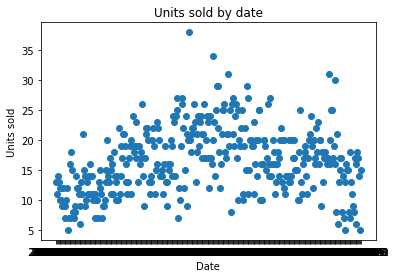

In [6]:
plt.scatter(df_train['date'], df_train['sales'])
plt.title('Units sold by date')
plt.xlabel('Date')
plt.ylabel('Units sold')
plt.show()

The Date field on the x-axis is not very explicit, so let's change the date field to evenly spaced numbers that represent 1 day.

In [7]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['date_delta'] = (df_train['date'] - df_train['date'].min())  / np.timedelta64(1,'D')

In [8]:
df_train.dtypes

date          datetime64[ns]
store                  int64
item                   int64
sales                  int64
date_delta           float64
dtype: object

In [9]:
df_train.head()

,date,store,item,sales,date_delta
0,2013-01-01,1,1,13,0.00000
1,2013-01-02,1,1,11,1.00000
2,2013-01-03,1,1,14,2.00000
3,2013-01-04,1,1,13,3.00000
4,2013-01-05,1,1,10,4.00000


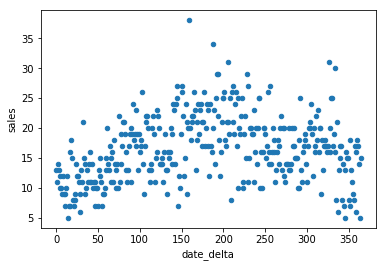

In [10]:
df_train.plot.scatter('date_delta', 'sales')
plt.show()

The above scatter plot now has the dates listed as 1 day each starting on Jan 1, 2013 and ending on Dec 31, 2013.

Next, let's create another visual line display, but first we set the 'date_delta' to the index of the data for graph formatting purposes.

In [11]:
df_date_index = df_train.set_index('date_delta')
df_date_index.head()

,date,store,item,sales
date_delta,,,,
0.00000,2013-01-01,1,1,13
1.00000,2013-01-02,1,1,11
2.00000,2013-01-03,1,1,14
3.00000,2013-01-04,1,1,13
4.00000,2013-01-05,1,1,10


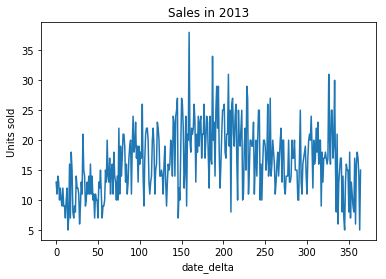

In [12]:
# plt.figure(figsize=(15,7))
df_date_index['sales'].plot()
plt.title('Sales in 2013')
plt.ylabel('Units sold')
plt.show()

This is the same graph as the scatterplot; just represented by a line graph.

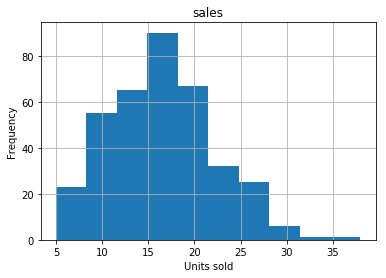

In [13]:
df_train.hist('sales')
plt.xlabel('Units sold')
plt.ylabel('Frequency')
plt.show()

Here is a histogram of the data.

## Building the model
First, we build the linear regression model using the date as the dpendent variable in order to predict sales (independent variable).  We then test some specific days of the year to see what sales number the model will predict.  We've also calculated the r-squared value to measure the amount of variance that is explained in our model.

Coefficients: 
 [[0.01075655]]
Intercept: 
 [14.54915787]

R-squared:
0.04154600524478458
[[14.81807153]]
[[16.70046715]]
[[18.31394911]]


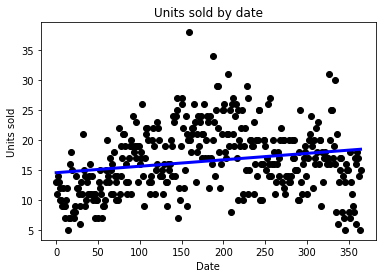

In [14]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
x = df_train[['date_delta']]
y = df_train[['sales']]

regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))

# run some test predictions
y_ = regr.predict([[25]])
y2_ = regr.predict([[200]])
y3_ = regr.predict([[350]])

print(y_)
print(y2_)
print(y3_)

# Plot outputs
# plt.figure(figsize=(15,7))

plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.title('Units sold by date')
plt.xlabel('Date')
plt.ylabel('Units sold')
plt.show()

The above scatterplot has the blue line that represents the predicted value based on the day of the year.

The next model we use is the K Nearest Neighbor method.

[[11.6]]
[[21.4]]
[[11.73333333]]
r-squared for date feature: -0.46 (+/- 1.24)


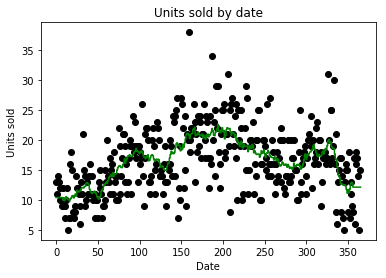

In [15]:
# KNN model
knn = neighbors.KNeighborsRegressor(n_neighbors=15, weights='uniform')

# Fit our model to our data.
x = df_train[['date_delta']]
y = df_train[['sales']]

knn.fit(x, y)

T = np.arange(0, 365, 0.1)[:, np.newaxis]

#neighbors.predict([[24, 190]])
y_ = knn.predict([[25]])
y2_ = knn.predict([[200]])
y3_ = knn.predict([[350]])

# predicted values across the range of dates (green line)
Y_ = knn.predict(T)

plt.scatter(x, y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.title('Units sold by date')
plt.xlabel('Date')
plt.ylabel('Units sold')

print(y_)
print(y2_)
print(y3_)

from sklearn.model_selection import cross_val_score

score = cross_val_score(knn, x, y, cv=5)
print("r-squared for date feature: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

The above scatterplot shows the K Nearest Neigbor predictions across the the days of 2013.  The green line represents the predicted value.  In this case there is no weighting in the model.  In other words, all of the neighbors are treated equally regardless of how close they are to the relevant data points.

## Evaluating the model
Linear Regression Model:  
- The r-squared value was **0.042** which is very poor.  Only 4% of the variance of the data is explained in our model.  This is not much better than drawing a straight line across the scatterplot.

K Nearest Neighbor Model:
- The r-squared value was **-0.46** which is really bad and worse than the LR Model.  This r-sqared value means our model is worse than just drawing a straight line across the date range.  Using a 'weighted' method and/or different k values did not significantly change te resulting r-squared value.

## Discussion and conclustion
It is extremely surprising that the KNN method did not have a higher r-squared value.  By looking at the green line and the tests included in the model, it looks like the KNN model does a much better job of predicting the outcome.  

As you can see in the data, there is some seasonality at work here and the middle of the year yields higher units sold for this item.  It's not surprising that a simple LR model is not going to work well, however, the KNN method seems much more accurate and a better choice for predicting sales.  